# (5주차) 10월3일 -- draft
> seaborn

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## [sns scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

`-` data 

In [52]:
np.random.seed(43052)
ϵ = np.random.randn(100)
y = np.cumsum(ϵ)

In [53]:
ϵ1 = ϵ[:-1] # (t-1) 시점
ϵ2 = ϵ[1:] # t 시점 

In [54]:
y1 = y[:-1] # (t-1) 시점 
y2 = y[1:] # t 시점

### plt 복습 

`-` 예시1

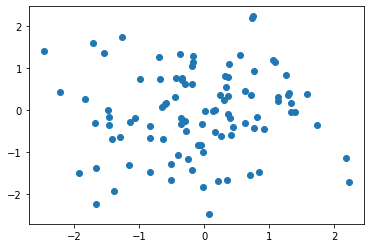

In [55]:
plt.plot(ϵ1,ϵ2,'o')

In [56]:
np.corrcoef(ϵ1,ϵ2) # np.corrcoef([ϵ1,ϵ2])

array([[1.        , 0.05289696],
       [0.05289696, 1.        ]])

`-` 예시2

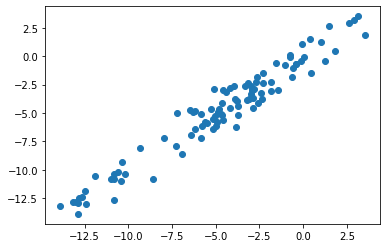

In [57]:
plt.plot(y1,y2,'o')

In [58]:
np.corrcoef(y1,y2)

array([[1.        , 0.97237553],
       [0.97237553, 1.        ]])

### sns: array

<AxesSubplot:>

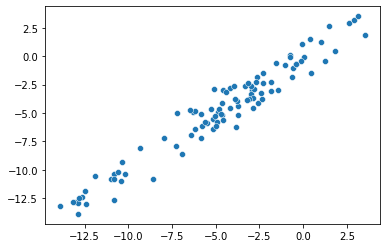

In [59]:
sns.scatterplot(data=None,x=y1,y=y2)

### sns: wide df

`-` 예시1

<AxesSubplot:xlabel='eps1', ylabel='eps2'>

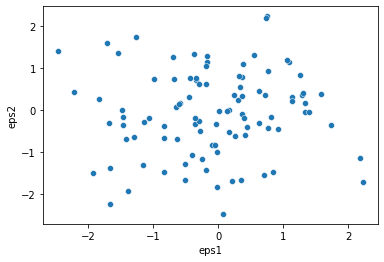

In [60]:
sns.scatterplot(data=pd.DataFrame({'eps1':ϵ1,'eps2':ϵ2}), x='eps1', y='eps2')

`-` 예시2

<AxesSubplot:xlabel='y1', ylabel='y2'>

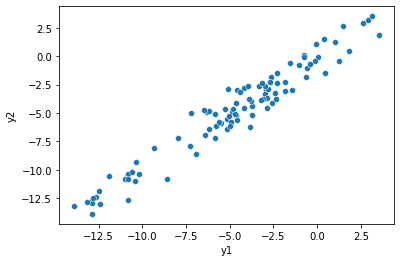

In [61]:
sns.scatterplot(data=pd.DataFrame({'y1':y1,'y2':y2}), x='y1', y='y2')

`-` 예시3

<AxesSubplot:xlabel='eps1', ylabel='eps2'>

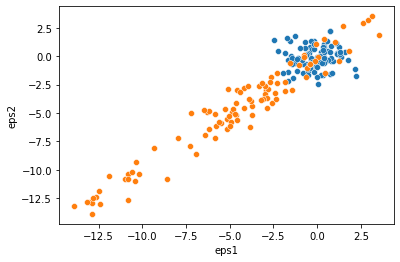

In [62]:
sns.scatterplot(data=pd.DataFrame({'eps1':ϵ1,'eps2':ϵ2}), x='eps1', y='eps2')
sns.scatterplot(data=pd.DataFrame({'y1':y1,'y2':y2}), x='y1', y='y2')

### sns: long df

In [63]:
_x = np.concatenate([ϵ1,y1])
_y = np.concatenate([ϵ2,y2])
_var = ['eps']*len(ϵ1)+['y']*len(y1)

In [68]:
df2= pd.DataFrame({'x':_x,'y':_y,'var':_var})
df2

,x,y,var
0,0.383420,1.084175,eps
1,1.084175,1.142778,eps
2,1.142778,0.307894,eps
3,0.307894,0.237787,eps
4,0.237787,0.355951,eps
...,...,...,...
193,-11.907476,-10.598788,y
194,-10.598788,-10.193412,y
195,-10.193412,-10.378481,y
196,-10.378481,-9.323094,y


`-` 예시1

<AxesSubplot:xlabel='x', ylabel='y'>

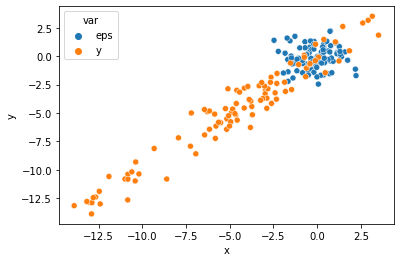

In [69]:
sns.scatterplot(data=df2,x='x',y='y',hue='var')

## seaborn: figure-level vs axes-level

ref: https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions

### 예제1

`-` 지금까지 살펴본 boxplot, histplot, lineplot, scatterplot 의 공통점 = 액시즈레벨 함수임 (함수의 argument로 ax를 명시할 수 있다) 

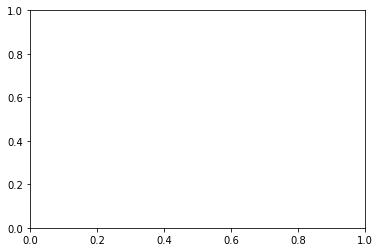

In [70]:
fig,myax = plt.subplots() 

In [71]:
sns.histplot(data=np.random.randn(100), ax=myax) # 우리가 저번시간에 구현한 g,h 함수 그 느낌이에요!!

<AxesSubplot:ylabel='Count'>

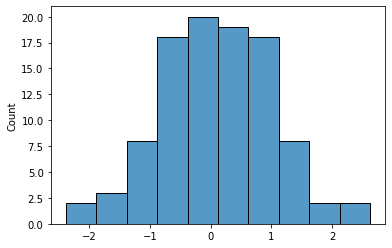

In [72]:
fig

In [73]:
myax.set_ylabel('count',size=20,family='serif',style='italic',weight=700)

Text(17.200000000000003, 0.5, 'count')

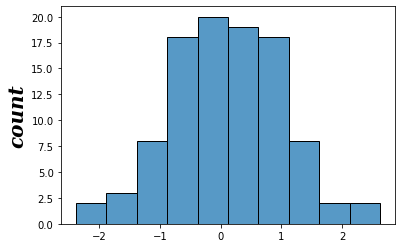

In [74]:
fig

### 예제2

`-` data

In [75]:
import cv2

In [76]:
!wget https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
img_before = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg',0)
!rm Unequalized_Hawkes_Bay_NZ.jpg

--2022-09-29 00:24:24--  https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110895 (108K) [image/jpeg]
Saving to: ‘Unequalized_Hawkes_Bay_NZ.jpg’

Unequalized_Hawkes_ 100%[===================>] 108.30K   537KB/s    in 0.2s    

2022-09-29 00:24:25 (537 KB/s) - ‘Unequalized_Hawkes_Bay_NZ.jpg’ saved [110895/110895]



(for win user)
```python
!pip install wget # 처음한번만 실행

import wget
wget.download('https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg')
img_before = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg',0)
```

In [77]:
img_before

array([[127, 145, 149, ..., 168, 167, 166],
       [165, 152, 143, ..., 168, 169, 168],
       [171, 145, 140, ..., 156, 154, 151],
       ...,
       [147, 132, 134, ..., 146, 145, 144],
       [146, 130, 132, ..., 146, 145, 144],
       [145, 128, 129, ..., 146, 145, 144]], dtype=uint8)

In [78]:
img_after = cv2.equalizeHist(img_before)

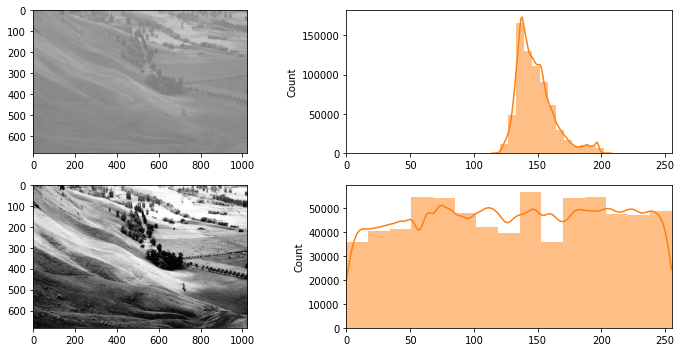

In [79]:
fig, ax = plt.subplots(2,2,figsize=(10,5))
ax[0,0].imshow(img_before,cmap='gray',vmin=0,vmax=255)
sns.histplot(data=img_before.reshape(-1),ax=ax[0,1],bins=15,kde=True,color='C1',lw=0); ax[0,1].set_xlim(0,255)
ax[1,0].imshow(img_after,cmap='gray',vmin=0,vmax=255); 
sns.histplot(data=img_after.reshape(-1),ax=ax[1,1],bins=15,kde=True,color='C1',lw=0); ax[1,1].set_xlim(0,255)
fig.tight_layout()

## mpl 미세먼지팁 (2) 

### Latex 

`-` 예시1

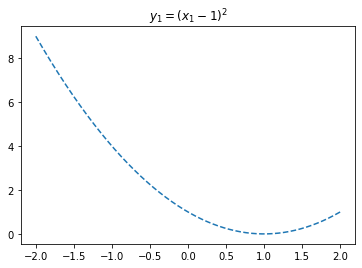

In [80]:
x1= np.linspace(-2,2,1000)
y1= (x1-1)**2 
plt.plot(x1,y1,'--')
plt.title('$y_1=(x_1-1)^2$');

`-` 예시2

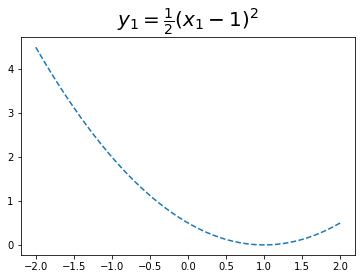

In [82]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
plt.plot(x1,y1,'--')
plt.title(r'$y_1=\frac{1}{2}(x_1-1)^2$',size=20);

`-` 예시3

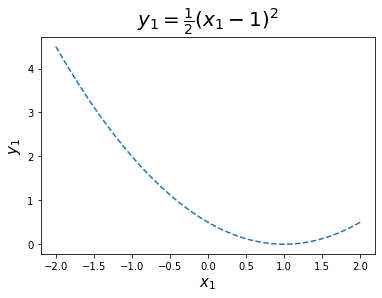

In [83]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
plt.plot(x1,y1,'--')
plt.title(r'$y_1=\frac{1}{2}(x_1-1)^2$',size=20)
plt.xlabel(r'$x_1$',size=15)
plt.ylabel(r'$y_1$',size=15);

`-` 예시4

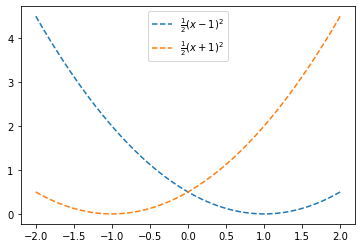

In [84]:
x1 = np.linspace(-2,2,1000)
y1 = 0.5*(x1-1)**2 
y2 = 0.5*(x1+1)**2
plt.plot(x1,y1,'--',label=r'$\frac{1}{2}(x-1)^2$')
plt.plot(x1,y2,'--',label=r'$\frac{1}{2}(x+1)^2$')
plt.legend()

### gcf, gca

`-` gcf

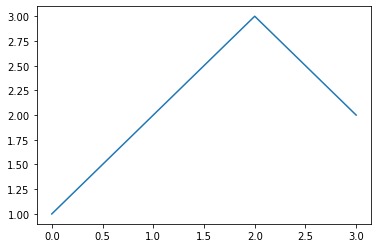

In [85]:
plt.plot([1,2,3,2])
fig = plt.gcf()

In [86]:
fig.suptitle('suptitle')

Text(0.5, 0.98, 'suptitle')

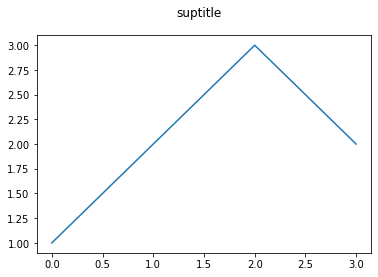

In [87]:
fig

`-` gca

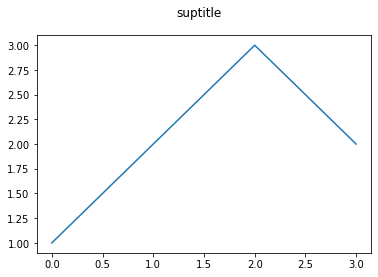

In [88]:
fig

In [89]:
ax = fig.gca()

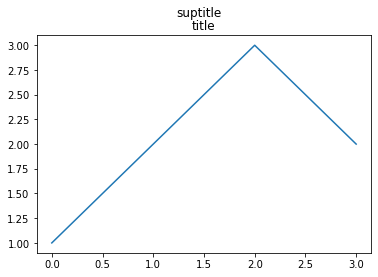

In [90]:
ax.set_title('title') 
fig